In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
from numba import jit

#pre
def roll():
    return random.randint(1,6)

@jit
def run_simulation(pool = 12,edge = 5,limit = 5,target = None,num_runs = 3):
    prepool = pool + edge
    prehits = []
    posthits = []
    normhits = []
    pretar = 0
    posttar = 0
    normtar = 0
    num = int(10**num_runs)
    
    #pre
    for i in range(num):
        prerolls = []
        for d in range(prepool):
            prerolls.append(roll())
        sixes = prerolls.count(6)
        while sixes > 0:
            newrolls = []
            for j in range(sixes):
                r = roll()
                prerolls.append(r)
                newrolls.append(r)
            sixes = newrolls.count(6)
        c = prerolls.count(5)+prerolls.count(6)
        if(c > target):
            pretar += 1
        prehits.append(c)
    #post
    for i in range(num):
        postrolls = []
        for d in range(pool):
            postrolls.append(roll())
        c = postrolls.count(1)+postrolls.count(2)+postrolls.count(3)+postrolls.count(4)
        for j in range(c):
            postrolls.append(roll())
            c = postrolls.count(5)+postrolls.count(6)
        if(c > target):
            posttar += 1
        posthits.append(min(c,limit))
     
    #normal
    for i in range(num):
        normrolls = []
        for d in range(pool):
            normrolls.append(roll())
        c = normrolls.count(5)+normrolls.count(6)
        if(c > target):
            normtar += 1
        normhits.append(min(c,limit))

    fig, ax = plt.subplots()
    ax.axvline(x=limit, c = "springgreen", label = 'limit')
    ax.hist(posthits,label='post',bins = limit)
    ax.hist(normhits,label='no edge',bins = limit*6)
    ax.hist(prehits,label='pre',bins = prepool*6)
    if(target):
        plt.axvline(x=target-0.5, c = "red", label = 'target')

    leg = ax.legend()
    ax.set_xlabel("Successes")
    ax.set_ylabel("Times hit out of %s rolls" %(num))
    ax.set_title("Distribution of successes")
    
    print("Change to hit target of %s successes or more: " %(target))
    print("With pre-edge: " + str(np.round(pretar/num*100))+ "%")
    print("With post-edge: " + str(np.round(posttar/num*100))+ "%")
    print("With no edge " + str(np.round(normtar/num*100))+ "%")
        
    


Change to hit target of 4 successes or more: 
With pre-edge: 72.0%
With post-edge: 84.0%
With no edge 29.0%


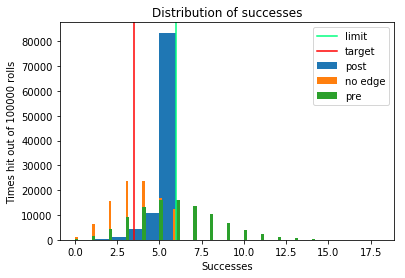

In [7]:
#run_simulation(dice_pool,edge_pool,limit,target,num_runs = 10^x)

run_simulation(11,4,6,4,5)